# [LAB-10] 1. 신뢰구간

### #01. 신뢰구간 개요

표본에서 얻은 정보를 기반으로 모집단의 특성을 추정하는 방법 중 하나가 **신뢰구간(Confidence Interval)** 이다.

신뢰구간은 주어진 **신뢰수준(일반적으로 95% 또는 99%)** 에 따라  
모수가 존재할 것으로 예상되는 범위를 나타낸다.  
예를 들어, **95% 신뢰구간은 모수가 95% 확률로 해당 구간에 속할 것**으로 추정한다는 의미이다.

즉, 모수(모집단의 특성)에 대한 **추정값의 범위**를 제공하여  
이를 통해 모평균의 신뢰성을 평가하는 데 사용한다.

신뢰구간은 일반적으로  
- 표본 크기  
- 추정 방법  
- 데이터의 변동성(분산)  

등의 요소에 따라 달라지며,  
정확한 신뢰구간을 구하기 위해서는 **통계학적 가정과 계산 방법**을 사용해야 한다.


### #01. 준비작업 
#### [1] 패키지 참조
scipy 패키지의 설치가 필요하다

In [3]:
from hossam import load_data
from scipy.stats import t
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
from math import sqrt


#### [2] 그래프 초기화


In [5]:
#한글을 지원하는 폰트 파일의 경로
font_path ='C:\\Data_Analysis_Basic\\[LAB-06] 데이터 시각화 개요\\NotoSansKR-Regular.ttf'
#폰트의 그룹을 시스템에 등록
fm.fontManager.addfont(font_path)
#폰트의 속성을 읽어옴
font_prop = fm.FontProperties(fname=font_path)
#읽어온 속성에서 폰트의 이름만 추출
font_name = font_prop.get_name()

#이미지의 선명도를 결정 (1인치 당 픽셀의 수)
my_dpi = 120 
#시스템에 등록된 글꼴 이름  (상단에서 확인한 폰트 이름으로 넣기)
my_font_name = 'Noto Sans KR'
#그림 스타일 지정
my_theme = 'dark'
#seaborn 스타일 (화풍 설정하기)
sb.set_theme(style=my_theme)
#그래프에 한글 폰트 적용
plt.rcParams['font.family']=my_font_name
#기본 폰트 크기
plt.rcParams['font.size'] =16
#그래프에 마이너스 꺠짐 방지 (한글환경에서 필수)
plt.rcParams['axes.unicode_minus']=False

#### [3] 데이터 가져오기

In [6]:
origin = load_data('height')
origin.head()

[data] https://data.hossam.kr/data/lab10/height.xlsx
[desc] 어느 학교의 학년, 성별, 키에 대한 가상의 조사 자료 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata


,학년,성별,키
0,1,남자,163
1,2,여자,154
2,1,남자,171
3,3,여자,160
4,4,남자,169


### #02. 신뢰구간 구하기
#### [1] 신뢰구간을 구하는데 필요한 값 산출

(1) 신뢰수준과 대상 데이터

In [ ]:
clevel=0.95
data = origin['키']

(2) 신뢰수준과 대상 데이터

In [8]:
n=len(data)
n

36

## (3) 자유도 (degree of freedom)

주어진 제약조건(규칙) 때문에 마음대로 바꿀 수 없는 값을 제외하고, 실제로 **‘자유롭게 움직일 수 있는 값의 수’**를 의미한다.

예시  
x₁ + x₂ + x₃ = 30 일 때, x₁, x₂ 두 개의 값이 결정되면 나머지 하나는 자동으로 결정된다.  
→ 이 경우 자유롭게 정할 수 있는 값은 **2개**, 즉 **자유도 = 2**

---

### 📌 통계에서의 자유도는 n − 1

표본 분산은 n이 아니라 **n − 1**로 나눈다.

\[
s^2 = \frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n - 1}
\]

이유  
- 평균을 계산할 때 이미 1개의 자유를 소모했기 때문  
- 평균이 고정되면 n개 중 한 값은 자동으로 결정된다  

따라서,

### 👉 통계에서의 자유도 = 전체 관측치 − 1


In [10]:
dof = n-1
dof

35

(4) 표본 평균

In [11]:
sample_mean = data.mean()
sample_mean

np.float64(167.83333333333334)

(5) 표본 표준 편차

In [12]:
sample_std =data.std()
sample_std

np.float64(7.315345905306578)

(6) 표본 표준 오차

In [13]:
sample_std_error = sample_std / sqrt(n)
sample_std_error

np.float64(1.2192243175510964)

#### [2] 신뢰구간

## 📝 [2] 신뢰구간

`scipy.stats` 패키지의 `t` 객체가 포함하는  
`interval(신뢰도, 자유도, loc=샘플평균, scale=샘플표준오차)`  
메서드를 사용한다.

---

### 📌 파라미터 설명

| 파라미터 | 설명 |
|---------|------|
| **신뢰도** | 95%, 99% 등을 0~1 범위 값으로 입력 |
| **자유도** | 통계 모델의 매개변수나 관측치들이 얼마나 자유롭게 변할 수 있는지를 나타내는 값<br>→ 전체 데이터 수 − 1 |
| **샘플평균** | 데이터들의 평균값 |
| **샘플표준오차 (Standard Error)** | 데이터들의 표준오차 →  \( \frac{\text{표준편차}}{\sqrt{\text{샘플크기}}} \) |

---



In [14]:
cmin , cmax = t.interval(clevel, dof,loc=sample_mean,scale=sample_std_error)

cmin,cmax


(np.float64(165.35817637995726), np.float64(170.30849028670943))

### #03.신뢰구간 범위 시각화

C:\Users\itwill\AppData\Local\Temp\ipykernel_21748\970733114.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.kdeplot(data=data, fill=False, alpha=0.5, palette="pastel")


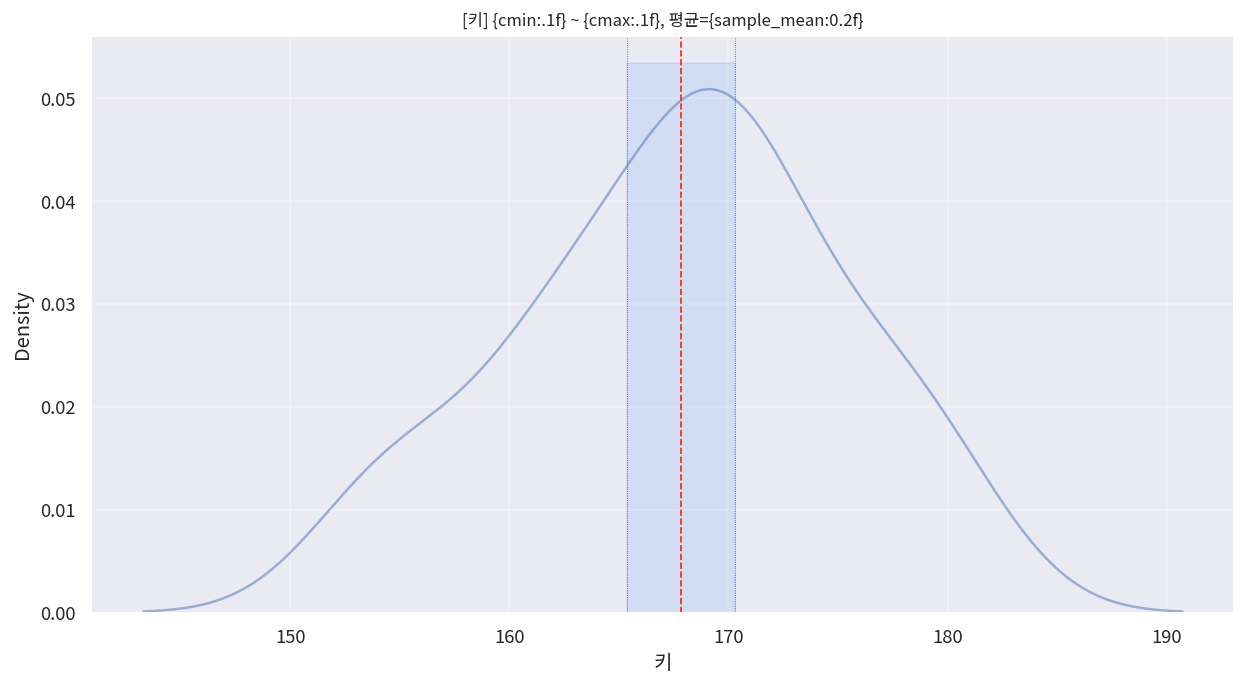

In [15]:
# 1) 그래프 초기화
width_px  = 1280            # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수

figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)


# 2) KDE Plot 그리기
sb.kdeplot(data=data, fill=False, alpha=0.5, palette="pastel")


# 신뢰구간 범위 그리기 (cmin ~ cmax)
ax.axvline(cmin, linestyle=":", color="#0066ff", linewidth=0.5)
ax.axvline(cmax, linestyle=":", color="#0066ff", linewidth=0.5)


# 현재 축 범위 가져오기
ymin, ymax = ax.get_ylim()
ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1, color="#0066ff88")


# 평균 표시
ax.axvline(sample_mean, linestyle='--', linewidth=1, color="#ff2200")


# 3) 그래프 꾸미기
ax.grid(True, alpha=0.3)     # 배경 격자 표시
ax.set_title(
    f"[{data.name}] {{cmin:.1f}} ~ {{cmax:.1f}}, 평균={{sample_mean:0.2f}}",
    fontsize=10
)


# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료
